In [ ]:
# 📦 1. Installer les bibliothèques
!pip install scikit-learn pandas joblib

In [1]:
# 📚 2. Importer les bibliothèques
import numpy as np
import pandas as pd
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
import joblib

In [2]:
# 🏭 3. Générer les données pour Machine de moulage
def generate_moulage_data(n=1000):
    data = []

    n_normal = n // 3
    n_risque = n // 3
    n_critique = n - n_normal - n_risque  # pour faire 1000 pile

    # Normales
    for _ in range(n_normal):
        temp = np.random.normal(210, 10)
        pression = np.random.normal(90, 10)
        vib = np.random.normal(0.05, 0.01)
        data.append([temp, pression, vib, 0])  # état normal

    # À risque
    for _ in range(n_risque):
        temp = np.random.normal(220, 10)
        pression = np.random.normal(80, 10)
        vib = np.random.normal(0.1, 0.02)
        data.append([temp, pression, vib, 1])  # état à risque

    # Critiques
    for _ in range(n_critique):
        temp = np.random.normal(240, 10)
        pression = np.random.normal(65, 10)
        vib = np.random.normal(0.18, 0.02)
        data.append([temp, pression, vib, 2])  # état critique

    np.random.shuffle(data)  # mélanger les lignes
    return pd.DataFrame(data, columns=['temperature', 'pression', 'vibration', 'etat'])

In [4]:
# 🏭 4. Générer les données pour Machine de soufflage
def generate_soufflage_data(n=1000):
    data = []

    n_normal = n // 3
    n_risque = n // 3
    n_critique = n - n_normal - n_risque

    # Normal
    for _ in range(n_normal):
        temp = np.random.normal(120, 10)
        pression = np.random.normal(28, 5)
        vib = np.random.normal(0.06, 0.01)
        data.append([temp, pression, vib, 0])

    # Risque
    for _ in range(n_risque):
        temp = np.random.normal(135, 10)      # température un peu plus haute
        pression = np.random.normal(40, 7)    # pression plus haute
        vib = np.random.normal(0.12, 0.02)    # vibration augmentée
        data.append([temp, pression, vib, 1])

    # Critique
    for _ in range(n_critique):
        temp = np.random.normal(160, 15)      # température très élevée
        pression = np.random.normal(55, 10)   # pression très élevée
        vib = np.random.normal(0.20, 0.03)    # vibration forte
        data.append([temp, pression, vib, 2])

    np.random.shuffle(data)
    return pd.DataFrame(data, columns=['temperature', 'pression', 'vibration', 'etat'])

In [5]:
# 🏭 5. Générer les données pour Machine de refroidissement
def generate_refroidissement_data(n=1000):
    data = []

    n_normal = n // 3
    n_risque = n // 3
    n_critique = n - n_normal - n_risque

    # Normal
    for _ in range(n_normal):
        temp = np.random.normal(25, 5)        # température fraîche normale
        pression = np.random.normal(5, 1)     # pression correcte
        vib = np.random.normal(0.03, 0.005)   # vibration faible normale
        data.append([temp, pression, vib, 0])

    # Risque
    for _ in range(n_risque):
        temp = np.random.normal(35, 7)        # température plus élevée (moins bon refroidissement)
        pression = np.random.normal(3, 1)     # pression un peu basse
        vib = np.random.normal(0.07, 0.01)    # vibration modérée
        data.append([temp, pression, vib, 1])

    # Critique
    for _ in range(n_critique):
        temp = np.random.normal(45, 10)       # température très élevée (problème)
        pression = np.random.normal(1, 0.5)   # pression très basse (problème grave)
        vib = np.random.normal(0.12, 0.02)    # vibration forte (composant défectueux)
        data.append([temp, pression, vib, 2])

    np.random.shuffle(data)
    return pd.DataFrame(data, columns=['temperature', 'pression', 'vibration', 'etat'])

In [6]:
# 🧪 5. Fonction pour entraîner un modèle
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

def train_model_multiclass(df):
    X = df[['temperature', 'pression', 'vibration']]
    y = df['etat']  # 0=normal, 1=risque, 2=critique

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    model = RandomForestClassifier(class_weight='balanced', random_state=42)
    model.fit(X_scaled, y)

    return model, scaler

In [7]:
# ✅ 6. Générer les données
df_moulage = generate_moulage_data()
df_soufflage = generate_soufflage_data()
df_refroidissement = generate_refroidissement_data()

📊 Données - Machine de moulage


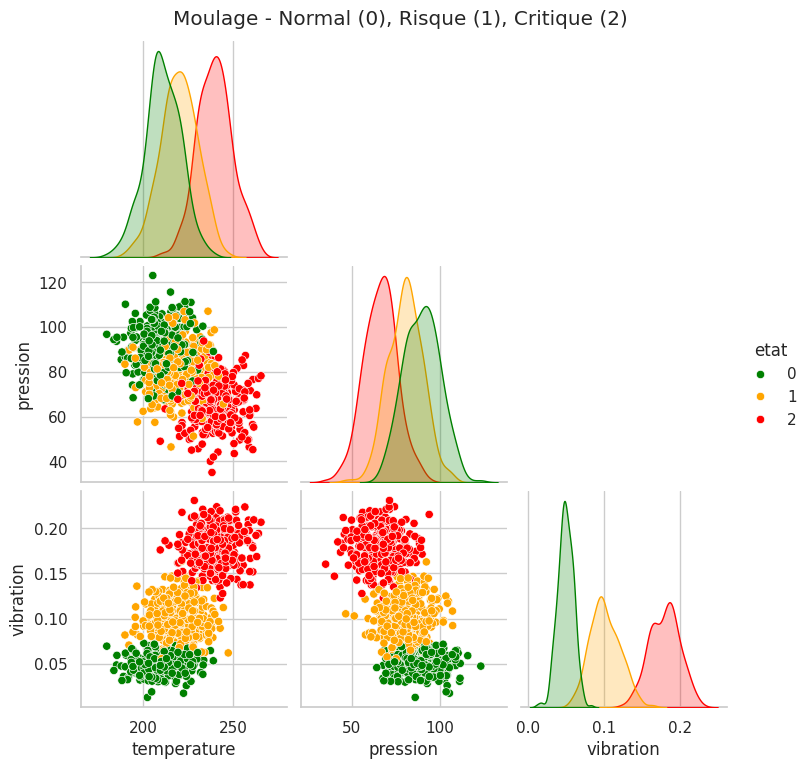

📊 Données - Machine de soufflage


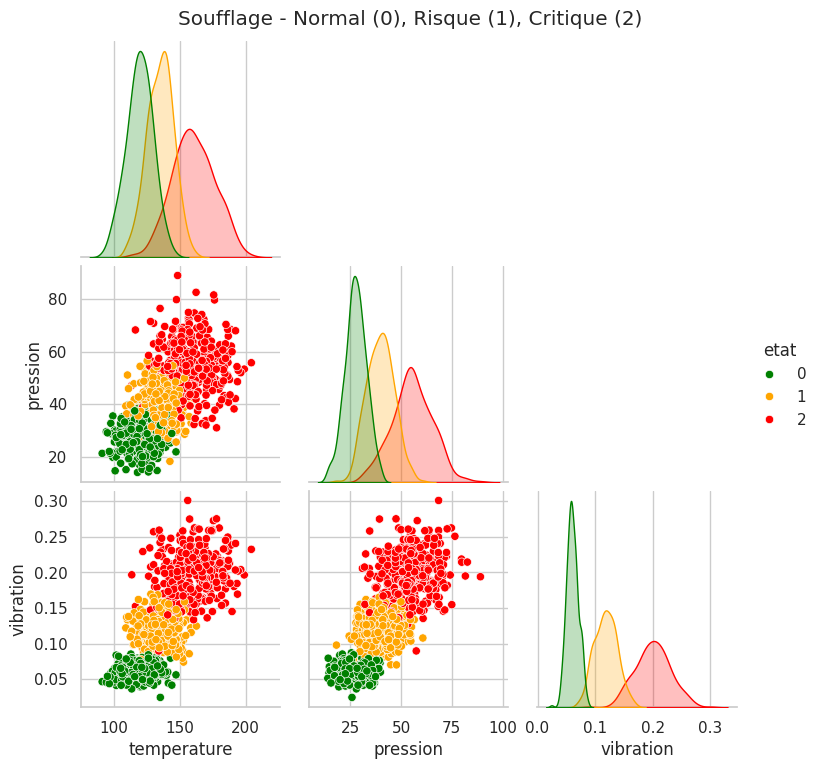

📊 Données - Machine de refroidissement


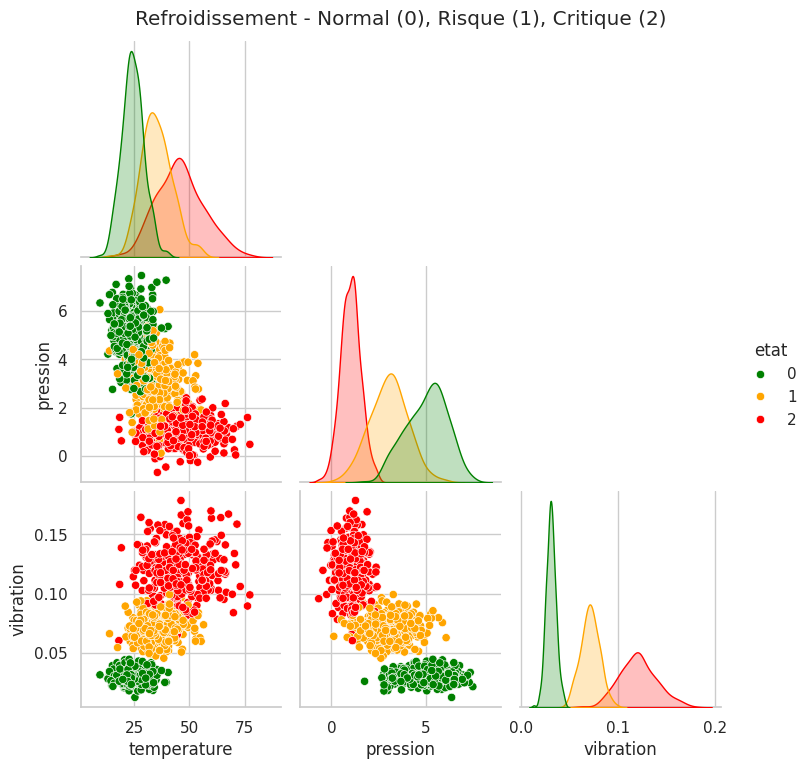

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid", palette="muted")

# 📈 Visualisation pour la machine de moulage
print("📊 Données - Machine de moulage")
sns.pairplot(df_moulage, hue="etat", corner=True,
             palette={0: "green", 1: "orange", 2: "red"},
             diag_kind="kde")
plt.suptitle("Moulage - Normal (0), Risque (1), Critique (2)", y=1.02)
plt.show()

# 📈 Visualisation pour la machine de soufflage
print("📊 Données - Machine de soufflage")
sns.pairplot(df_soufflage, hue="etat", corner=True,
             palette={0: "green", 1: "orange", 2: "red"},
             diag_kind="kde")
plt.suptitle("Soufflage - Normal (0), Risque (1), Critique (2)", y=1.02)
plt.show()

# 📈 Visualisation pour la machine de refroidissement
print("📊 Données - Machine de refroidissement")
sns.pairplot(df_refroidissement, hue="etat", corner=True,
             palette={0: "green", 1: "orange", 2: "red"},
             diag_kind="kde")
plt.suptitle("Refroidissement - Normal (0), Risque (1), Critique (2)", y=1.02)
plt.show()

In [9]:
# ✅ 7. Entraîner les modèles
# Entraîner le modèle pour la machine de moulage
model_moulage, scaler_moulage = train_model_multiclass(df_moulage)

# Entraîner le modèle pour la machine de soufflage
model_soufflage, scaler_soufflage = train_model_multiclass(df_soufflage)

# Entraîner le modèle pour la machine de refroidissement
model_refroidissement, scaler_refroidissement = train_model_multiclass(df_refroidissement)

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
import os

# Chemin dans ton Drive
save_path = "/content/drive/MyDrive/model_inter_donnees"

# Crée le dossier s’il n'existe pas
os.makedirs(save_path, exist_ok=True)


In [12]:
import joblib

joblib.dump(model_moulage, f"{save_path}/model_moulage.pkl")
joblib.dump(scaler_moulage, f"{save_path}/scaler_moulage.pkl")

joblib.dump(model_soufflage, f"{save_path}/model_soufflage.pkl")
joblib.dump(scaler_soufflage, f"{save_path}/scaler_soufflage.pkl")

joblib.dump(model_refroidissement, f"{save_path}/model_refroidissement.pkl")
joblib.dump(scaler_refroidissement, f"{save_path}/scaler_refroidissement.pkl")

print(f"✅ Modèles sauvegardés dans Google Drive ici : {save_path}")

✅ Modèles sauvegardés dans Google Drive ici : /content/drive/MyDrive/model_inter_donnees


In [ ]:
import joblib

# Chemin vers le dossier dans Drive où tu as sauvegardé les modèles
drive_path = "/content/drive/MyDrive/model_inter_donnees/"

# Charger les modèles et scalers
model_moulage = joblib.load(drive_path + "model_moulage.pkl")
scaler_moulage = joblib.load(drive_path + "scaler_moulage.pkl")

model_soufflage = joblib.load(drive_path + "model_soufflage.pkl")
scaler_soufflage = joblib.load(drive_path + "scaler_soufflage.pkl")

print("✅ Modèles et scalers chargés avec succès depuis Google Drive.")

✅ Modèles et scalers chargés avec succès depuis Google Drive.
